# Modelo de Regresión Lineal Multivariable


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy.stats import normaltest
from sklearn.model_selection import cross_val_score
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

#### Carga de datos y filtrado de variables


In [ ]:
train = pd.read_csv("train.csv")  

variables_clave = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath', 'YearBuilt', 'KitchenAbvGr',
    'TotRmsAbvGrd', 'Fireplaces'
]

X = train[variables_clave]
y = train['SalePrice']


#### División entre train (70%) y test (30%)


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

#### Ajuste de modelo de regresión lineal


In [98]:
# Ajustar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

#### Predicción sobre el test set


In [99]:
# Predicción sobre test set
y_pred = modelo.predict(X_test)

#### Coeficiente (y = mx + c)


In [100]:
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': modelo.coef_
})
print("Coeficientes:")
print(coef_df)

Coeficientes:
        Variable   Coeficiente
0    OverallQual  17405.532768
1      GrLivArea     28.567953
2     GarageCars  15362.052480
3    TotalBsmtSF     12.451256
4       1stFlrSF     24.851017
5       2ndFlrSF     11.826300
6       FullBath    471.371513
7      YearBuilt    331.846809
8   KitchenAbvGr -31882.015868
9   TotRmsAbvGrd   5724.351821
10    Fireplaces   7883.507125
11  BedroomAbvGr  -8744.976545
12      FullBath    471.371513


#### Gráfico de dispersión sobre la recta de regresión


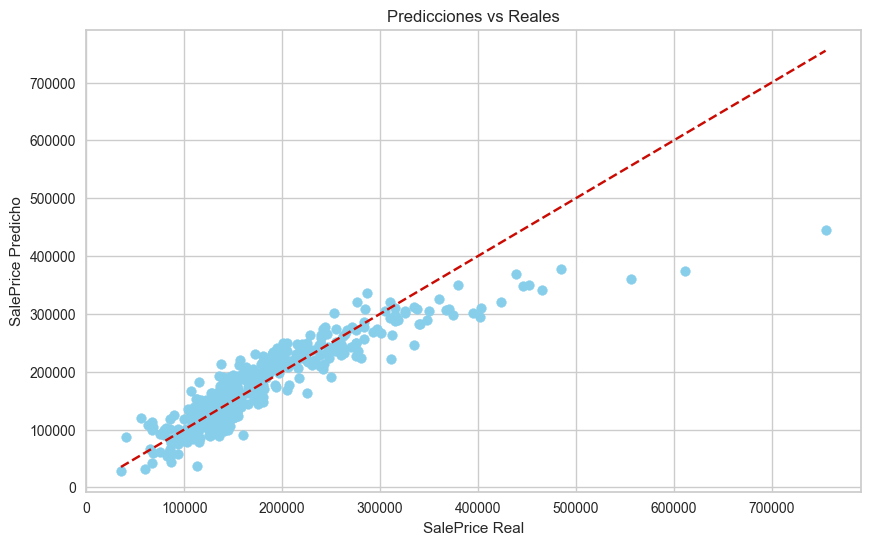

In [101]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred[:len(y_test)], color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea 1:1
plt.xlabel("SalePrice Real")
plt.ylabel("SalePrice Predicho")
plt.title("Predicciones vs Reales")
plt.grid(True)
plt.show()

#### Métricas de evaluación


In [102]:
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred))
print("R squared: %.2f" % r2_score(y_test, y_pred))

Mean Squared Error: 1337037430.91
R squared: 0.81


#### Análisis y muestra de residuales


##### Gráfico de residuales

Índice: 139
Valor real: 755000
Valor predicho: 445344.5092355617
Diferencia máxima: 309655.4907644383


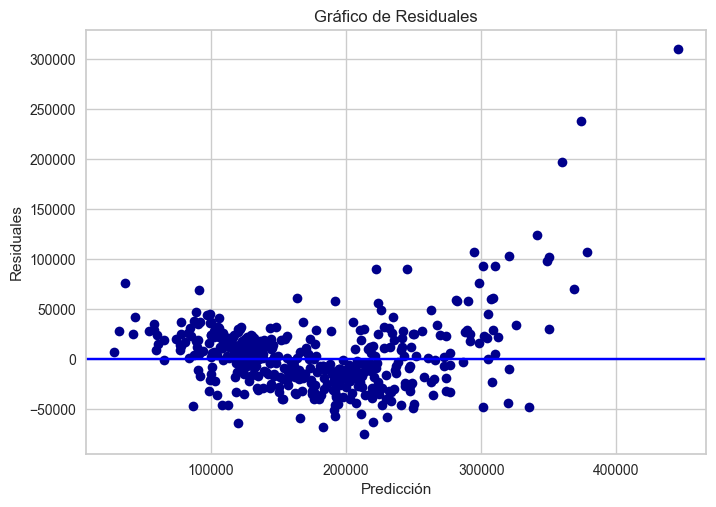

In [ ]:
residuales = y_test - y_pred
len(residuales)

In [108]:
for i in range(len(y_test)):
    print(y_test.iloc[i], y_pred[i], " --> ", "\t\tDIFF:", y_test.iloc[i] - y_pred[i])

154500 136538.55792525318  -->  		DIFF: 17961.442074746825
325000 304311.3939834407  -->  		DIFF: 20688.606016559293
115000 130680.95154632197  -->  		DIFF: -15680.951546321972
159000 191581.74456597923  -->  		DIFF: -32581.74456597923
315500 288124.1730777641  -->  		DIFF: 27375.826922235894
75500 60929.86148695671  -->  		DIFF: 14570.13851304329
311500 221995.77373719937  -->  		DIFF: 89504.22626280063
146000 181787.5640267178  -->  		DIFF: -35787.564026717795
84500 60266.16786906752  -->  		DIFF: 24233.832130932482
135500 135476.5871055727  -->  		DIFF: 23.412894427310675
145000 162723.88265847648  -->  		DIFF: -17723.882658476476
130000 102276.63244031614  -->  		DIFF: 27723.36755968386
81000 103149.97259472252  -->  		DIFF: -22149.972594722523
214000 220228.29104652512  -->  		DIFF: -6228.291046525119
181000 200610.88433557935  -->  		DIFF: -19610.88433557935
134500 120719.38140184444  -->  		DIFF: 13780.61859815556
183500 218103.05709525966  -->  		DIFF: -34603.05709525966
135000

In [109]:
# Calcular las diferencias absolutas
differences = [abs(t - p) for t, p in zip(y_test, y_pred)]

# Encontrar el índice con la diferencia máxima
max_index = differences.index(max(differences))

# Obtener los valores correspondientes
max_real_value = y_test.iloc[max_index]
max_pred_value = y_pred[max_index]
max_difference = differences[max_index]

print(f"Índice: {max_index}")
print(f"Valor real: {max_real_value}")
print(f"Valor predicho: {max_pred_value}")
print(f"Diferencia máxima: {max_difference}")

Índice: 139
Valor real: 755000
Valor predicho: 445344.5092355617
Diferencia máxima: 309655.4907644383


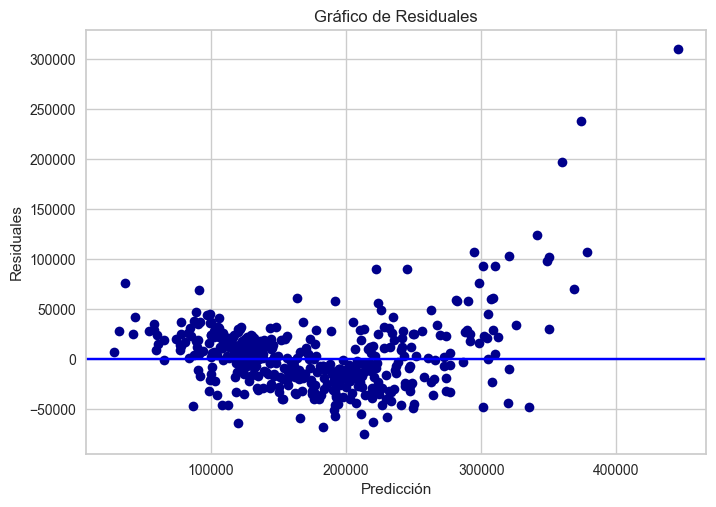

In [110]:
plt.plot(y_pred, residuales, 'o', color='darkblue')
plt.axhline(0, color='blue')
plt.title("Gráfico de Residuales")
plt.xlabel("Predicción")
plt.ylabel("Residuales")
plt.grid(True)
plt.show()

##### Histograma

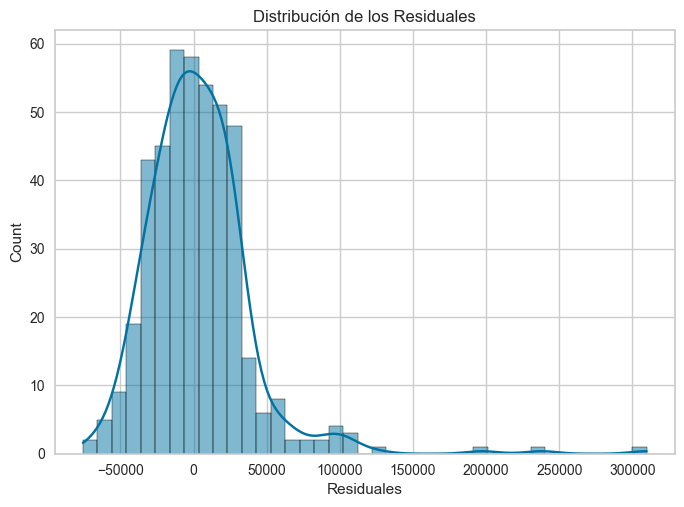

In [104]:
sns.histplot(residuales, kde=True)  # kde=True para incluir la curva de densidad
plt.xlabel("Residuales")
plt.title("Distribución de los Residuales")
plt.show()

##### Boxplot

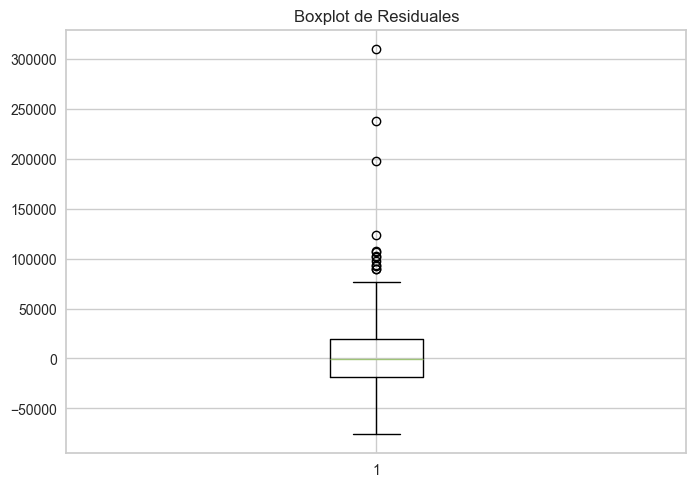

In [105]:
plt.boxplot(residuales)
plt.title("Boxplot de Residuales")
plt.show()

#### Prueba de Normalidad de Residuales

In [106]:
_, p_value = normaltest(residuales)
print(f"P-valor para normalidad de residuales: {p_value:.4f}")

if p_value > 0.05:
    print("No se rechaza la hipótesis nula: Los residuales siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: Los residuales NO siguen una distribución normal.")

P-valor para normalidad de residuales: 0.0000
Se rechaza la hipótesis nula: Los residuales NO siguen una distribución normal.


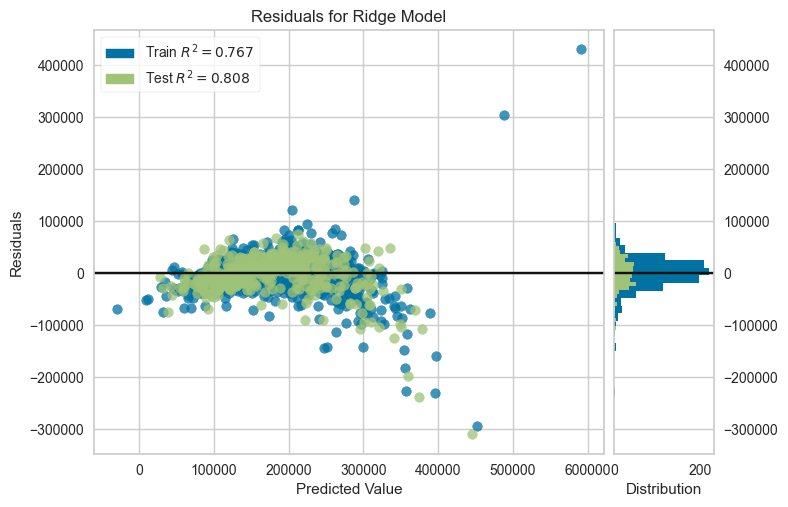

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [113]:
# Create Ridge regression model
model = Ridge()

# Create the residuals plot visualizer
visualizer = ResidualsPlot(model)

# Fit the model
visualizer.fit(X_train, y_train)

# Score the model
visualizer.score(X_test, y_test)

# Show the plot
visualizer.show()

#### Análisis de coeficientes

In [115]:
# Add a constant to the model (intercept)
X_with_const = sm.add_constant(X)

# Fit the OLS model
est = sm.OLS(y, X_with_const)
est2 = est.fit()

# Print the summary of the model
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     435.5
Date:                Sat, 01 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:24:52   Log-Likelihood:                -17428.
No. Observations:                1460   AIC:                         3.488e+04
Df Residuals:                    1447   BIC:                         3.495e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.445e+05   9.08e+04     -7.094   

In [116]:
X_with_const = sm.add_constant(X)  # Agregar intercepto
est = sm.OLS(y, X_with_const)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     435.5
Date:                Sat, 01 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:25:21   Log-Likelihood:                -17428.
No. Observations:                1460   AIC:                         3.488e+04
Df Residuals:                    1447   BIC:                         3.495e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.445e+05   9.08e+04     -7.094   

##### ¿Está overfitted?

In [117]:
model = LinearRegression()
scores = cross_val_score(model, X_test, y_test, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.81163065 0.80867708 0.82707695 0.76737978 0.87455338]
Mean score: 0.8178635687434186
